In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

from numpy.random import seed

seed(11111)

In [3]:
train=pd.read_csv('/kaggle/input/titanic/train.csv')
test=pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Osen, Mr. Olaf Elon",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Matinoff, Mr. Nicola",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [6]:
print(train.shape,test.shape)

(891, 12) (418, 11)


In [7]:

train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [8]:
test.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

In [9]:
print(test.shape)

(418, 11)


In [10]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
pid=test['PassengerId']

In [12]:
train = train.set_index("PassengerId")
test = test.set_index("PassengerId")

# dataframe 
combine = pd.concat([train, test], axis=0, sort=False)
combine.shape

(1309, 11)

In [13]:
y=train['Survived']


In [14]:
combine.isnull().sum().sort_values(ascending=False)

Cabin       1014
Survived     418
Age          263
Embarked       2
Fare           1
Ticket         0
Parch          0
SibSp          0
Sex            0
Name           0
Pclass         0
dtype: int64

# **CABIN ,TICKET**

In [15]:

combine.drop(['Cabin'],axis=1,inplace=True)

In [16]:
combine['Ticket'] = combine.Ticket.str.split().apply(lambda x : 0 if x[:][-1] == 'LINE' else x[:][-1])
combine.Ticket = combine.Ticket.values.astype('int64')

# **SEX**

In [17]:
change = {'female':0,'male':1}
combine.Sex = combine.Sex.map(change)

# **EMBARKED**

In [18]:
combine['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [19]:
combine['Embarked'].fillna('S',inplace=True)

In [20]:
change = {'S':0,'C':1,'Q':2}
combine.Embarked = combine.Embarked.map(change)

# **FARE**

In [21]:
combine['Fare'].value_counts()

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
33.5000     1
7.8000      1
26.3875     1
15.5792     1
7.1417      1
Name: Fare, Length: 281, dtype: int64

In [22]:
combine['Fare'].fillna(combine['Fare'].mean(),inplace=True)
auxfare = pd.cut(combine['Fare'],5)

In [23]:
combine['Fare'] = LabelEncoder().fit_transform(auxfare) 


In [24]:
pd.crosstab(combine['Fare'], combine['Survived'])

Survived,0.0,1.0
Fare,,
0,535,303
1,8,25
2,6,11
3,0,3


# **AGE**

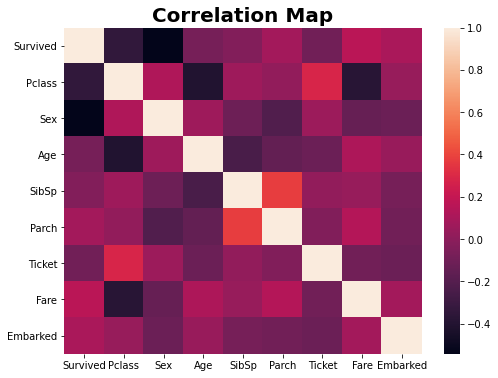

In [25]:
corr_df = combine.corr()
fig, axs = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_df).set_title("Correlation Map",fontdict= { 'fontsize': 20, 'fontweight':'bold'});

In [26]:
combine.groupby(['Pclass','Sex','Survived'])['Age'].median()

Pclass  Sex  Survived
1       0    0.0         25.0
             1.0         35.0
        1    0.0         45.5
             1.0         36.0
2       0    0.0         32.5
             1.0         28.0
        1    0.0         30.5
             1.0          3.0
3       0    0.0         22.0
             1.0         19.0
        1    0.0         25.0
             1.0         25.0
Name: Age, dtype: float64

In [27]:
combine["Age"].fillna(combine.groupby(['Pclass','Sex'])['Age'].transform("mean"), inplace=True)

In [28]:
auxage = pd.cut(combine['Age'], 4)
combine['Age'] = LabelEncoder().fit_transform(auxage) 

In [29]:
pd.crosstab(combine['Age'], combine['Survived'])

Survived,0.0,1.0
Age,,
0,97,82
1,341,200
2,94,55
3,17,5


# **SIBSP , PARCH**

In [30]:
combine['FamilySize']=combine['SibSp']+combine['Parch']+1
combine.drop(['SibSp','Parch'], axis = 1, inplace = True)


In [31]:
combine.loc[combine['FamilySize'] == 1, 'FamilySize'] = 0                           
combine.loc[(combine['FamilySize'] > 1) & (combine['FamilySize'] <= 4), 'FamilySize'] = 1 
combine.loc[(combine['FamilySize'] > 4) & (combine['FamilySize'] <= 6), 'FamilySize'] = 2  
combine.loc[combine['FamilySize']  > 6, 'FamilySize'] = 3  

# **TITLE**

In [32]:
combine['Title'] = combine.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(combine['Title'], combine['Sex'])

Sex,0,1
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


In [33]:


    combine['Title'] = combine['Title'].replace(['Ms', 'Mlle','Mme','Lady'], 'Miss')
    combine['Title'] = combine['Title'].replace(['Countess','Dona'], 'Mrs')
    combine['Title'] = combine['Title'].replace(['Don','Sir'], 'Mr')
    combine['Title'] = combine['Title'].replace(['Rev','Dr','Major', 'Col', 'Capt','Jonkheer','Countess'], 'Rare')
    combine.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [34]:
combine['Title'] = LabelEncoder().fit_transform(combine['Title']) 

# **NAME**

In [35]:
combine['LastName'] = last= combine.Name.str.extract('^(.+?),', expand = False)

In [36]:
combine['WomChi'] = ((combine.Title == 0) | (combine.Sex == 0))

In [37]:
family = combine.groupby([combine.LastName, combine.Pclass, combine.Ticket]).Survived

combine['FTotalCount'] = family.transform(lambda s: s[combine.WomChi].fillna(0).count())
combine['FTotalCount'] = combine.mask(combine.WomChi, (combine.FTotalCount - 1), axis=0)

combine['FSurvivedCount'] = family.transform(lambda s: s[combine.WomChi].fillna(0).sum())
combine['FSurvivedCount'] = combine.mask(combine.WomChi, combine.FSurvivedCount - combine.Survived.fillna(0), axis=0)

combine['FSurvivalRate'] = (combine.FSurvivedCount / combine.FTotalCount.replace(0, np.nan))

In [38]:
combine.isna().sum()

Survived           418
Pclass               0
Name                 0
Sex                  0
Age                  0
Ticket               0
Fare                 0
Embarked             0
FamilySize           0
Title                0
LastName             0
WomChi               0
FTotalCount        245
FSurvivedCount     245
FSurvivalRate     1014
dtype: int64

In [39]:
# filling the missing values
combine.FSurvivalRate.fillna(0, inplace = True)
combine.FTotalCount.fillna(0, inplace = True)
combine.FSurvivedCount.fillna(0, inplace = True)

# **MODELLING**

In [40]:
combine['PassengerId'] = combine.index

In [41]:
combine = pd.get_dummies(combine, columns=['Sex','Fare','Pclass'])

In [42]:
combine.drop(['Name','LastName','WomChi','FTotalCount','FSurvivedCount','Embarked','Title'], axis = 1, inplace = True)

In [43]:
combine.columns

Index(['Survived', 'Age', 'Ticket', 'FamilySize', 'FSurvivalRate',
       'PassengerId', 'Sex_0', 'Sex_1', 'Fare_0', 'Fare_1', 'Fare_2', 'Fare_3',
       'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [44]:
combine.head(10)

,Survived,Age,Ticket,FamilySize,FSurvivalRate,PassengerId,Sex_0,Sex_1,Fare_0,Fare_1,Fare_2,Fare_3,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,
1,0.0,1,21171,1,0.0,1,0,1,1,0,0,0,0,0,1
2,1.0,1,17599,1,0.0,2,1,0,1,0,0,0,1,0,0
3,1.0,1,3101282,0,0.0,3,1,0,1,0,0,0,0,0,1
4,1.0,1,113803,1,0.0,4,1,0,1,0,0,0,1,0,0
5,0.0,1,373450,0,0.0,5,0,1,1,0,0,0,0,0,1
6,0.0,1,330877,0,0.0,6,0,1,1,0,0,0,0,0,1
7,0.0,2,17463,0,0.0,7,0,1,1,0,0,0,1,0,0
8,0.0,0,349909,2,0.0,8,0,1,1,0,0,0,0,0,1
9,1.0,1,347742,1,1.0,9,1,0,1,0,0,0,0,0,1


In [45]:
combine.drop(['PassengerId'],axis=1,inplace=True)

In [46]:
trainx=combine.iloc[:891]
testx=combine.iloc[891:]
print(trainx.shape,testx.shape)

(891, 14) (418, 14)


In [47]:
X_train = trainx.drop(['Survived'], axis = 1)
y = trainx["Survived"]
train_names = X_train.columns

X_test = testx.drop(['Survived'], axis = 1)

In [48]:
# Scaler
trainx = StandardScaler().fit_transform(X_train)
testx = StandardScaler().fit_transform(X_test)

In [49]:
from sklearn .linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron

from sklearn.metrics import accuracy_score
from xgboost.sklearn import XGBClassifier

In [50]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(trainx,y)
predDT = decision_tree.predict(testx)

print("Accuracy of the model: ",round(decision_tree.score(trainx, y) * 100, 2))

Accuracy of the model:  99.89


In [51]:
clf = XGBClassifier()
clf.fit(trainx,y, eval_metric='auc', verbose=True)
xgb_pred = clf.predict(testx)
xgb_score = round(clf.score(trainx, y) * 100, 2)
print("score:", xgb_score, "%")

score: 99.44 %


In [52]:
perceptron = Perceptron(max_iter=4)
perceptron.fit(trainx,y)

percep_pred = perceptron.predict(testx)

percep_score = round(perceptron.score(trainx,y) * 100, 2)
print("score:", percep_score, "%")

score: 91.47 %


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [53]:
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(trainx,y)
rf_pred = random_forest.predict(testx)

rf_score = round(random_forest.score(trainx,y) * 100, 2)
print("score:", rf_score, "%")

score: 96.52 %


In [54]:
submission = pd.DataFrame({
        "PassengerId": pid,
        "Survived": predDT
    })
submission.to_csv('submission.csv',index=False)

In [55]:
submit = pd.DataFrame({"PassengerId":pid, 'Survived':predDT.astype(int).ravel()})
submit.to_csv("submission.csv",index = False)

In [56]:
from IPython.display import HTML
import base64

# function that takes in a dataframe and creates a text link to  
# download it (will only work for files < 2MB or so)
def create_download_link(df, title = "Download CSV file", filename = "submission.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

submission = pd.DataFrame({
        "PassengerId": pid,
        "Survived": predDT
    })
create_download_link(submission)